# Кривые обучения топ-5 моделей по награде

Этот ноутбук создает графики кривых обучения для топ-5 моделей:
1. ppo_seed42_5000K: 294.04 ± 21.93
2. ppo_seed42_1000K: 268.10 ± 12.26
3. ppo_seed42: 255.72 ± 27.06
4. ppo_seed42_400K: 248.55 ± 18.60
5. ppo_seed42_500K: 244.57 ± 21.89

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

print("Библиотеки импортированы успешно")

Библиотеки импортированы успешно


In [10]:
# Определение путей к топ-5 моделям
top5_models = {
    'ppo_seed42_5000K': {
        'path': '../results/experiments/ppo_seed42_5000K',
        'label': 'PPO (seed=42, 5M шагов) - 294.04±21.93'
    },
    'ppo_seed42_1000K': {
        'path': '../results/experiments/ppo_seed42_1000K',
        'label': 'PPO (seed=42, 1M шагов) - 268.10±12.26'
    },
    'ppo_seed42': {
        'path': '../results/experiments/ppo_seed42',
        'label': 'PPO (seed=42, 500K шагов) - 255.72±27.06'
    },
    'ppo_seed42_400K': {
        'path': '../results/experiments/ppo_seed42_400K',
        'label': 'PPO (seed=42, 400K шагов) - 248.55±18.60'
    },
    'ppo_seed42_500K': {
        'path': '../results/experiments/ppo_seed42_500K',
        'label': 'PPO (seed=42, 500K) - 244.57±21.89'
    }
}

print(f"Топ-5 моделей определены")

Топ-5 моделей определены


In [11]:
!pwd

/home/gna/workspase/education/MEPHI/training_an_agent_in_a_classical_environment/notebooks


In [12]:
!ls -l ../results/experiments/ppo_seed42_5000K/metrics.csv

-rw-r--r-- 1 gna gna 44171 фев  5 22:31 ../results/experiments/ppo_seed42_5000K/metrics.csv


In [17]:
# Загрузка данных метрик
def load_metrics_data(model_path: str) -> pd.DataFrame:
    """Загрузить данные метрик из CSV файла."""
    csv_path = Path(model_path) / "metrics.csv"
    if csv_path.exists():
        print(f"✅ Файл {csv_path} найден")
        return pd.read_csv(csv_path)
    else:
        print(f"Предупреждение: Файл {csv_path} не найден")
        return pd.DataFrame()

# Загрузка данных
print("Загрузка данных метрик для топ-5 моделей...")
print("=" * 60)

for model_name, model_info in top5_models.items():
    df = load_metrics_data(model_info['path'])
    model_info['data'] = df
    if not df.empty:
        print(f"✅ {model_name}: загружено {len(df)} записей")
    else:
        print(f"✗ {model_name}: данные не найдены")

Загрузка данных метрик для топ-5 моделей...
✅ Файл ../results/experiments/ppo_seed42_5000K/metrics.csv найден
✅ ppo_seed42_5000K: загружено 500 записей
✅ Файл ../results/experiments/ppo_seed42_1000K/metrics.csv найден
✅ ppo_seed42_1000K: загружено 100 записей
✅ Файл ../results/experiments/ppo_seed42/metrics.csv найден
✅ ppo_seed42: загружено 52 записей
✅ Файл ../results/experiments/ppo_seed42_400K/metrics.csv найден
✅ ppo_seed42_400K: загружено 40 записей
✅ Файл ../results/experiments/ppo_seed42_500K/metrics.csv найден
✅ ppo_seed42_500K: загружено 50 записей


График сохранен: results/reports/top5_reward_vs_timestep.png


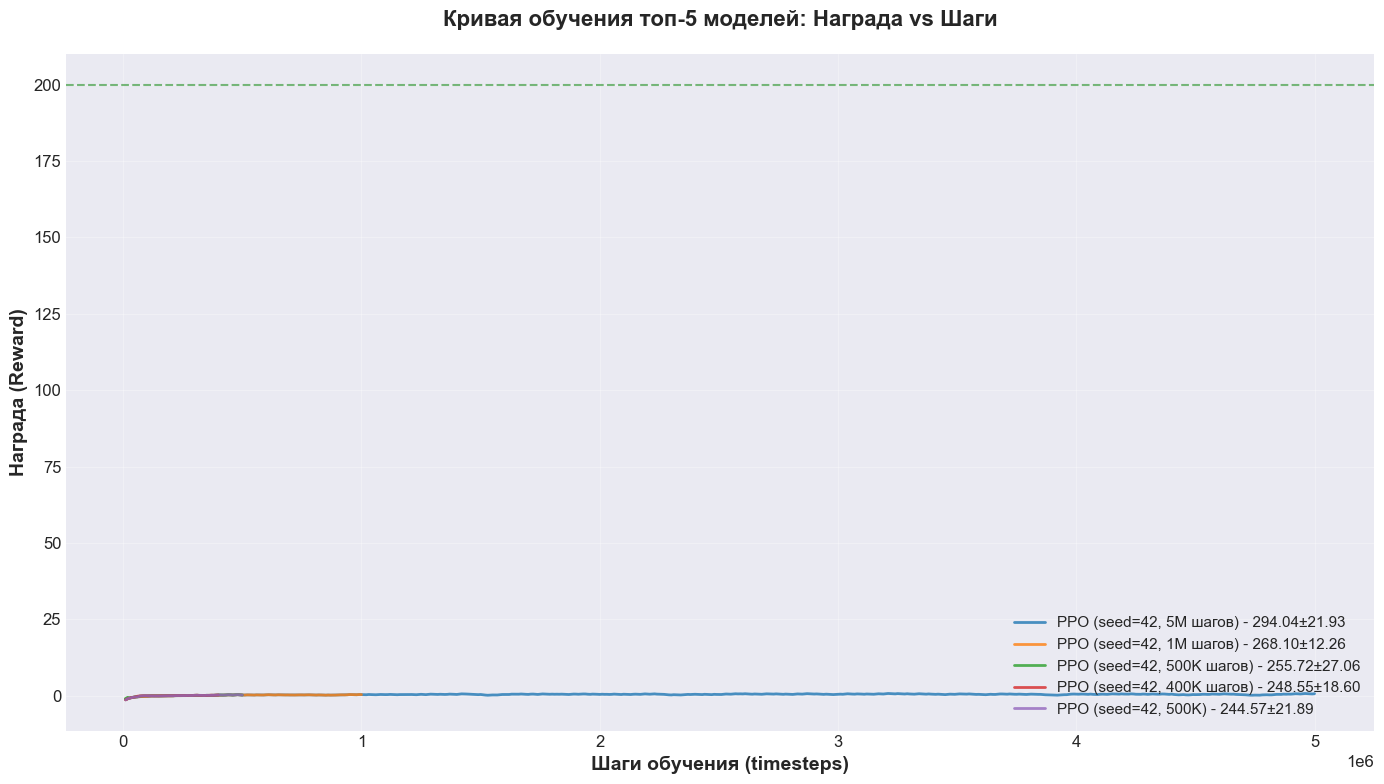

In [14]:
# График 1: Награда vs Шаги
fig, ax = plt.subplots(figsize=(14, 8))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for (model_name, model_info), color in zip(top5_models.items(), colors):
    df = model_info['data']
    if not df.empty:
        # Используем скользящее среднее для сглаживания
        window = min(10, len(df) // 10 + 1)
        if 'reward_mean' in df.columns and 'timesteps' in df.columns:
            smoothed_reward = df['reward_mean'].rolling(window=window, min_periods=1).mean()
            ax.plot(df['timesteps'], smoothed_reward,
                   label=model_info['label'],
                   color=color,
                   linewidth=2,
                   alpha=0.8)

ax.set_xlabel('Шаги обучения (timesteps)', fontsize=14, fontweight='bold')
ax.set_ylabel('Награда (Reward)', fontsize=14, fontweight='bold')
ax.set_title('Кривая обучения топ-5 моделей: Награда vs Шаги',
             fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='lower right', fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3)

# Добавляем горизонтальную линию целевой награды
ax.axhline(y=200, color='green', linestyle='--', alpha=0.5,
          linewidth=1.5, label='Цель: 200')

plt.tight_layout()

# Сохранение графика
output_dir = Path('results/reports')
output_dir.mkdir(parents=True, exist_ok=True)
output_path = output_dir / 'top5_reward_vs_timestep.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"График сохранен: {output_path}")

plt.show()

График сохранен: results/reports/top5_reward_vs_episode.png


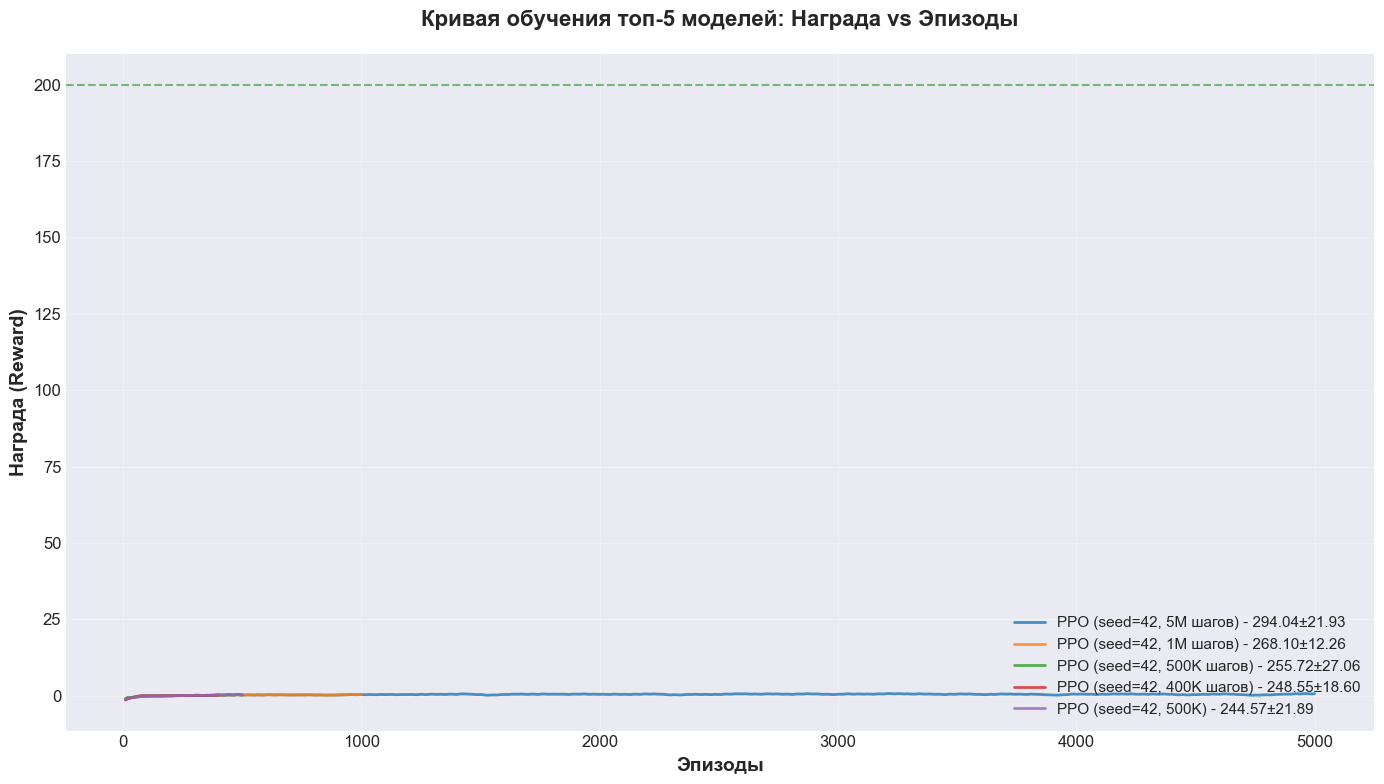

In [15]:
# График 2: Награда vs Эпизоды
fig, ax = plt.subplots(figsize=(14, 8))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for (model_name, model_info), color in zip(top5_models.items(), colors):
    df = model_info['data']
    if not df.empty:
        # Используем скользящее среднее для сглаживания
        window = min(10, len(df) // 10 + 1)
        if 'reward_mean' in df.columns and 'episode_count' in df.columns:
            smoothed_reward = df['reward_mean'].rolling(window=window, min_periods=1).mean()
            ax.plot(df['episode_count'], smoothed_reward,
                   label=model_info['label'],
                   color=color,
                   linewidth=2,
                   alpha=0.8)

ax.set_xlabel('Эпизоды', fontsize=14, fontweight='bold')
ax.set_ylabel('Награда (Reward)', fontsize=14, fontweight='bold')
ax.set_title('Кривая обучения топ-5 моделей: Награда vs Эпизоды',
             fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='lower right', fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3)

# Добавляем горизонтальную линию целевой награды
ax.axhline(y=200, color='green', linestyle='--', alpha=0.5,
          linewidth=1.5, label='Цель: 200')

plt.tight_layout()

# Сохранение графика
output_path = output_dir / 'top5_reward_vs_episode.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"График сохранен: {output_path}")

plt.show()

## Сводка

✓ Созданы графики кривых обучения для топ-5 моделей
✓ Графики сохранены в директории `results/reports/`:
  - `top5_reward_vs_timestep.png` - Награда vs Шаги
  - `top5_reward_vs_episode.png` - Награда vs Эпизоды